In [1]:
import sys
sys.path.append("../")

import numpy as np
import torch
import bbobtorch
import torch
import model 
import gt_sampling
import torch.optim as optim

import torch
from utils.utils import plot_simulated_meshgrid, plot_collage
import numpy as np

sys.path.append("../misc")
import bbob_deferential as bobby

In [2]:
# create ground truth functions
n_dim = 2
samples = 1000
seed = 42

problem_f01 = bbobtorch.create_f01(n_dim, seed=seed)

In [3]:
# sampling from groundtruth functions
sample_f01 = gt_sampling.get_sample(problem_f01, n_samples=samples, n_dim=2, seed=42, method='random', )

c:\Users\tzehl\Documents\programming\OptimizationTestfunctionGeneration\main\gt_sampling.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_sample = torch.tensor(result[i], dtype=torch.float64).reshape((1, n_dim)).float()


In [4]:
X_input = sample_f01[0]

## Simulate the function with NN

In [23]:
input_dim = 2
hidden_dim = 16
hidden_layers = 4
output_dim = 1
learning_rate = 1e-9
num_epochs = 1000
bs = 256

m = model.NN(input_dim, hidden_dim, hidden_layers)
optimizer = optim.SGD(m.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()
mean, std = -40./2, 26./4
# Training loop
for epoch in range(num_epochs):
    x = X_input.clone().detach().requires_grad_(True)

    optimizer.zero_grad()
    trues = (bobby.create_f01(2)(x) - mean)/std
    preds = m(x)
    
    Karloss = criterion(preds.flatten(), trues.flatten())

    # Backward and optimize
    Karloss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {Karloss.item():.4f}')

Epoch [20/1000], Loss: 149.2302
Epoch [40/1000], Loss: 156.3523
Epoch [60/1000], Loss: 1010.8185
Epoch [80/1000], Loss: 266.7838
Epoch [100/1000], Loss: 14665.8682
Epoch [120/1000], Loss: 586.2370
Epoch [140/1000], Loss: 6060.2075
Epoch [160/1000], Loss: 849.7091
Epoch [180/1000], Loss: 2236.4238
Epoch [200/1000], Loss: 21046.8633
Epoch [220/1000], Loss: 10.9637
Epoch [240/1000], Loss: 1183.1494
Epoch [260/1000], Loss: 941.9214
Epoch [280/1000], Loss: 143.2341
Epoch [300/1000], Loss: 82.6808
Epoch [320/1000], Loss: 456.8919
Epoch [340/1000], Loss: 311.6809
Epoch [360/1000], Loss: 382.6336
Epoch [380/1000], Loss: 251.2206
Epoch [400/1000], Loss: 28.1903
Epoch [420/1000], Loss: 52.4717
Epoch [440/1000], Loss: 157.9279
Epoch [460/1000], Loss: 21743.4277
Epoch [480/1000], Loss: 373.1125
Epoch [500/1000], Loss: 8002.3682
Epoch [520/1000], Loss: 708.1746
Epoch [540/1000], Loss: 166.1624
Epoch [560/1000], Loss: 26.2601
Epoch [580/1000], Loss: 26705.2344
Epoch [600/1000], Loss: 282.6357
Epoch 

In [24]:

# generate mesh grid for plotting
with torch.no_grad():
    x = np.linspace(-5.0, 5.0, 100)
    y = np.linspace(-5.0, 5.0, 100)
    X, Y = np.meshgrid(x, y)
    mesh_samples = np.c_[X.ravel(), Y.ravel()]
    mesh_samples_tensor = torch.tensor(mesh_samples, dtype=torch.float32)
    mesh_results = m(mesh_samples_tensor).reshape(X.shape)

<AxesSubplot: title={'center': 'Simulated Function from NN'}, xlabel='$x_{1}$', ylabel='$x_{2}$'>

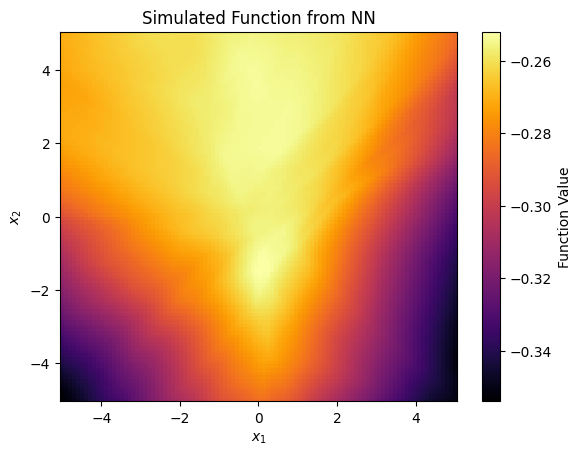

In [25]:
plot_simulated_meshgrid(X, Y, mesh_results, model='NN')

c:\Users\tzehl\anaconda3\envs\ds\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


<AxesSubplot: title={'center': 'Ground Truth of BBOB F24 Function'}, xlabel='$x_{1}$', ylabel='$x_{2}$'>

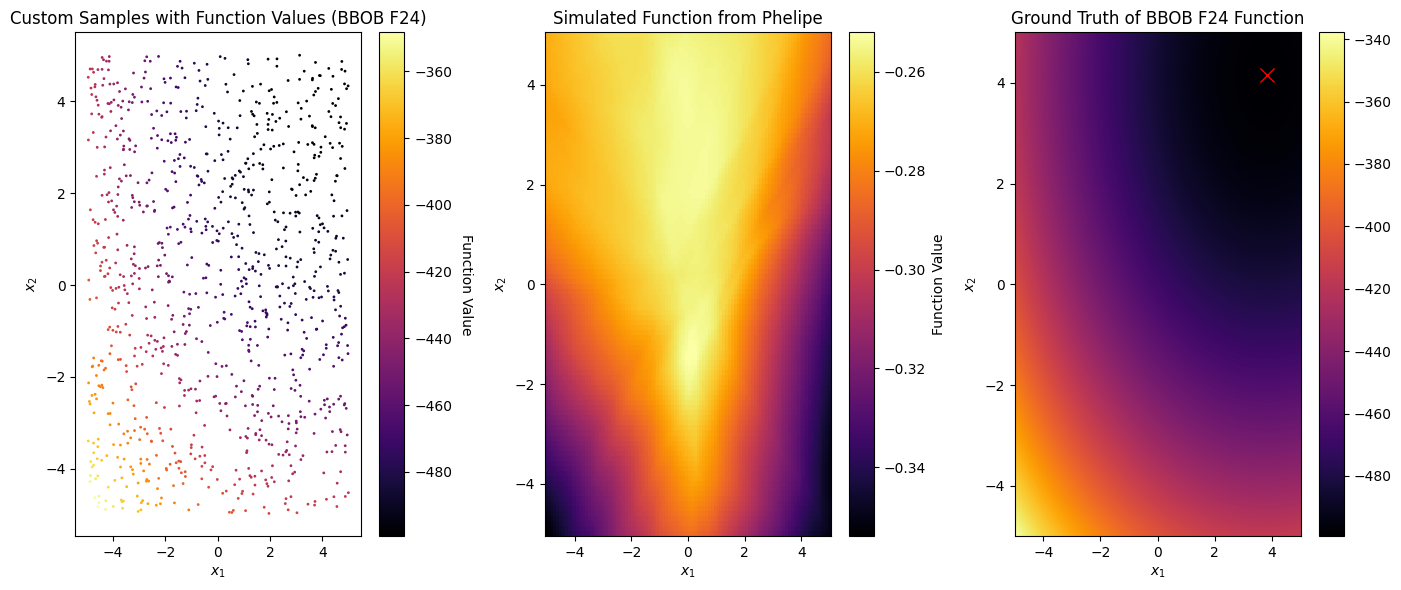

In [26]:
plot_collage(sample_f01[0].detach().numpy(), sample_f01[1].detach().numpy(), problem_f01, "BBOB F24", "Phelipe", X, Y, mesh_results)

In [ ]:
sys.path.append("../")
torch.save(m.state_dict(), "../models/f01_mse_nn_model.pt")